In [6]:
"""
This script verifies the pipeline for MFCC to wav reconstruction

Evie Holyoake, 2/2022

"""

from sklearn.preprocessing import MinMaxScaler
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import soundfile as sf

Number of frames: 113471, 110996
duration of audio 1 is 4.0, number of frames is 88200, shape is (88200,)


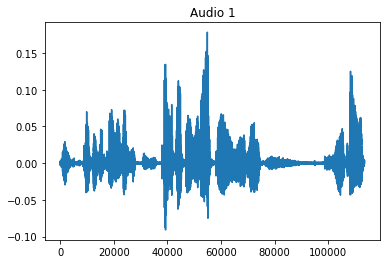

In [7]:
"""
Truncate the audio clips into two uniform 4 second clips

Two distinct voices will be used
"""

clip_length = 4
MFCC_param = 64

# specify working directory
folderpath = 'C:/Users/eholy/Desktop/SD/reconstruction_verification/raw_audio/'
file1 = 'id10484_4sec.wav'
file2 = 'id10168_4sec.wav'
savepath = 'C:/Users/eholy/Desktop/SD/reconstruction_verification/truncated_audio/'

# load the .wav files
audio_orig1, s_rate1 = librosa.load(folderpath+file1)
audio_orig2, s_rate2 = librosa.load(folderpath+file2)

# truncate the clips
frames_per_clip = clip_length * s_rate1
print(f'Number of frames: {len(audio_orig1)}, {len(audio_orig2)}')
audio_trunc1 = audio_orig1[0:frames_per_clip]
#audio_trunc1.export(savepath + '/audio_trunc1.wav', format='wav')
audio_trunc2 = audio_orig2[0:frames_per_clip]
#audio_trunc2.export(savepath + '/audio_trunc2.wav', format='wav')

trunc1_dur = librosa.get_duration(y=audio_trunc1, sr = s_rate1)
trunc2_dur = librosa.get_duration(y=audio_trunc2, sr = s_rate2)
#trunc2_dur = librosa.get_duration(filename=savepath + '/audio_trunc2.wav')

# play audio 1
print(f'duration of audio 1 is {trunc1_dur}, number of frames is {len(audio_trunc1)}, shape is {audio_trunc1.shape}')
plt.figure()
plt.title("Audio 1")
plt.plot(audio_orig1)
plt.show()
ipd.Audio(audio_orig1, rate=22050)


duration of audio 2 is 4.0, number of frames is 88200


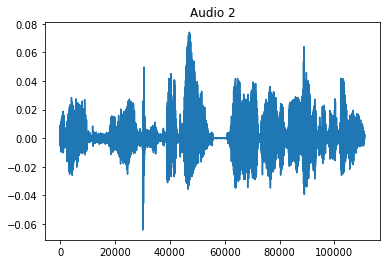

In [8]:
# play audio 2
print(f'duration of audio 2 is {trunc2_dur}, number of frames is {len(audio_trunc2)}')
plt.figure()
plt.title("Audio 2")
plt.plot(audio_orig2)
plt.show()
ipd.Audio(audio_orig2, rate=22050)

The combined file duration is 4.0 seconds


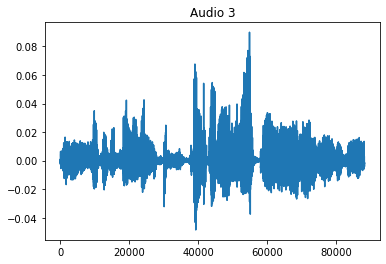

In [10]:
"""
Combining the two .wav files


since we can use Python's sum() function to find the sum of a list, we should be able to
append all the .wav files to a list and then combine them

"""

# set audio file path
sound1_filepath = folderpath + file1
sound2_filepath = folderpath + file2
sounds_comb_filepath = savepath + '/testCombination.wav'

#sound1 = np.load(open(sound1_filepath), 'rb')
#sound2 = np.load(open(sound2_filepath), 'rb')

#sound1 = AudioSegment.from_wav(sound1_filepath)
#sound2 = AudioSegment.from_wav(sound2_filepath)

overlap_array = [audio_trunc1, audio_trunc2]

# combine audios
sounds_comb = np.array(sum(overlap_array)/len(overlap_array))
#sounds_comb1 = np.array(sum(overlap_array))

sounds_comb_dur = librosa.get_duration(y=sounds_comb, sr=s_rate1)

print(f'The combined file duration is {sounds_comb_dur} seconds')


sf.write(sounds_comb_filepath, sounds_comb, 22050)

# load and play combined audio
audio_orig3, s_rate3 = librosa.load(sounds_comb_filepath)
plt.figure()
plt.title("Audio 3")
plt.plot(sounds_comb)
plt.show()
ipd.Audio(sounds_comb, rate=22050)

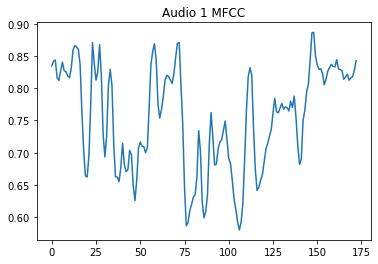

mfcc shape  (64, 173)


In [5]:
"""
MFCC Creation for Audio 1
Inverse for Audio 1
"""

srMult = 1 # cannot exceed audio sampling rate of .wav file -- leads to NaN values
mfccMult = 1
data1 = librosa.feature.mfcc(y=audio_trunc1, 
                            sr=22050*srMult, 
                            S=None, n_mfcc=MFCC_param, 
                            dct_type=2, 
                            norm='ortho', 
                            lifter=0,
                            win_length=2048, # default is 2048; with sr of 22050, this corresponds to ~93ms
                            hop_length=512   # default is 512; with sr of 22050, this corresponds to ~23ms
                           )
data1_nonscaled = data1

#print('before transform ', data1[0][:10])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data1)
data1 = scaler.transform(data1)

plt.figure()
plt.title("Audio 1 MFCC")
plt.plot(data1[MFCC_param-1])
plt.show()

print('mfcc shape ', data1.shape)

data1inv = scaler.inverse_transform(data1)

#print('after inverse transform ', data1[0][:10])

wav1 = librosa.feature.inverse.mfcc_to_audio(data1_nonscaled) # doesn't seem to really make a difference?


ipd.Audio(wav1, rate=22050)

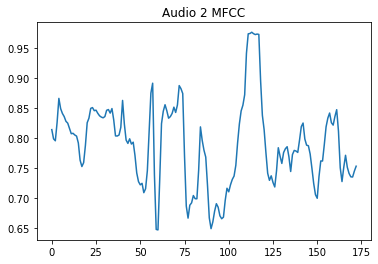

mfcc shape  (64, 173)


In [6]:
"""
MFCC Creation for Audio 2
"""

srMult = 1 # cannot exceed audio sampling rate of .wav file -- leads to NaN values
mfccMult = 1
data2 = librosa.feature.mfcc(y=audio_trunc2, 
                            sr=22050*srMult, 
                            S=None, n_mfcc=MFCC_param, 
                            dct_type=2, 
                            norm='ortho', 
                            lifter=0,
                            win_length=2048, # default is 2048; with sr of 22050, this corresponds to ~93ms
                            hop_length=512   # default is 512; with sr of 22050, this corresponds to ~23ms
                           )
data2_nonscaled = data2

#print('before transform ', data2[0][:10])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data2)
data2 = scaler.transform(data2)

plt.figure()
plt.title("Audio 2 MFCC")
plt.plot(data2[MFCC_param-1])
plt.show()

print('mfcc shape ', data2.shape)

data2inv = scaler.inverse_transform(data2)

#print('after inverse transform ', data2[0][:10])

wav2 = librosa.feature.inverse.mfcc_to_audio(data2_nonscaled) # doesn't seem to really make a difference?

ipd.Audio(wav2, rate=22050)

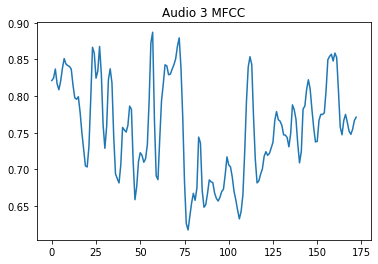

mfcc shape  (64, 173)


In [7]:
"""
MFCC Creation for Combined Audio
"""

srMult = 1 # cannot exceed audio sampling rate of .wav file -- leads to NaN values
mfccMult = 1
data3 = librosa.feature.mfcc(y=sounds_comb, 
                            sr=22050*srMult, 
                            S=None, n_mfcc=MFCC_param, 
                            dct_type=2, 
                            norm='ortho', 
                            lifter=0,
                            win_length=2048, # default is 2048; with sr of 22050, this corresponds to ~93ms
                            hop_length=512   # default is 512; with sr of 22050, this corresponds to ~23ms
                           )
data3_nonscaled = data3

#print('before transform ', data3[0][:10])
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data3)
data3 = scaler.transform(data3)

plt.figure()
plt.title("Audio 3 MFCC")
plt.plot(data3[MFCC_param-1])
plt.show()

print('mfcc shape ', data3.shape)

data3inv = scaler.inverse_transform(data3)

#print('after inverse transform ', data3[0][:10])

wav3 = librosa.feature.inverse.mfcc_to_audio(data3_nonscaled) # doesn't seem to really make a difference?

ipd.Audio(wav3, rate=22050)

In [8]:
"""
Compute Ideal Mask from Audio 1 and 3

overlap = (voice 1 + voice 2) / 2
voice 1 = overlap * mask
mask = voice 1 / overlap
"""

ideal_mask = np.divide(data1_nonscaled, data3_nonscaled)

recon1 = np.multiply(data3_nonscaled, ideal_mask)

wavrecon = librosa.feature.inverse.mfcc_to_audio(recon1)
ipd.Audio(wavrecon, rate=22050)
